In [1]:
###---------------------------
### Import necessary libraries
###---------------------------

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
###-------------
### Load dataset
###-------------

data = pd.read_csv('HR Data.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Checking for null values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# 1.Remove Unnecessary Columns

data.drop(['EmployeeNumber','EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [9]:
# 2.Renaming columns for better understanding..

column_renames = {
    'Attrition': 'Employee_Attrition',
    'BusinessTravel': 'Business_Travel_Frequency',
    'DailyRate': 'Daily_Rate',
    'DistanceFromHome': 'Home_Distance',
    'EducationField': 'Field_of_Education',
    'EnvironmentSatisfaction': 'Environment_Satisfaction',
    'JobInvolvement': 'Job_Involvement',
    'JobLevel': 'Job_Level',
    'JobSatisfaction': 'Job_Satisfaction',
    'MonthlyIncome': 'Monthly_Income',
    'MonthlyRate': 'Monthly_Rate',
    'NumCompaniesWorked': 'Companies_Worked',
    'PercentSalaryHike': 'Salary_Hike_Percent',
    'PerformanceRating': 'Performance_Rating',
    'RelationshipSatisfaction': 'Relationship_Satisfaction',
    'StockOptionLevel': 'Stock_Option_Level',
    'TotalWorkingYears': 'Total_Working_Years',
    'TrainingTimesLastYear': 'Training_Times_Last_Year',
    'WorkLifeBalance': 'Work_Life_Balance',
    'YearsAtCompany': 'Years_At_Company',
    'YearsInCurrentRole': 'Years_In_Current_Role',
    'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
    'YearsWithCurrManager': 'Years_With_Current_Manager'
}

data.rename(columns=column_renames, inplace=True)

In [10]:
# 3.Remove Redundant Entries (Duplicate Rows)

data.drop_duplicates(inplace=True)

In [11]:
data.shape          # No duplicate enteries indataset

(1470, 31)

In [12]:
# 4.Sanitize Specific Columns

data['Business_Travel_Frequency'] = data['Business_Travel_Frequency'].str.replace('_', ' ').str.title()

data['Gender'] = data['Gender'].str.capitalize()

In [13]:
# 5.Handle NaN Values

data.dropna(inplace=True)

In [14]:
data.shape                  # No NaN values in data

(1470, 31)

### Some visualization for the data

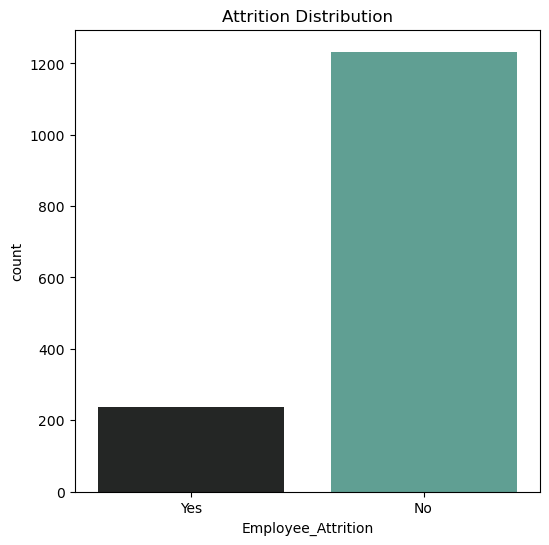

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Employee_Attrition', palette='dark:#5A9')
plt.title("Attrition Distribution")    
plt.show()

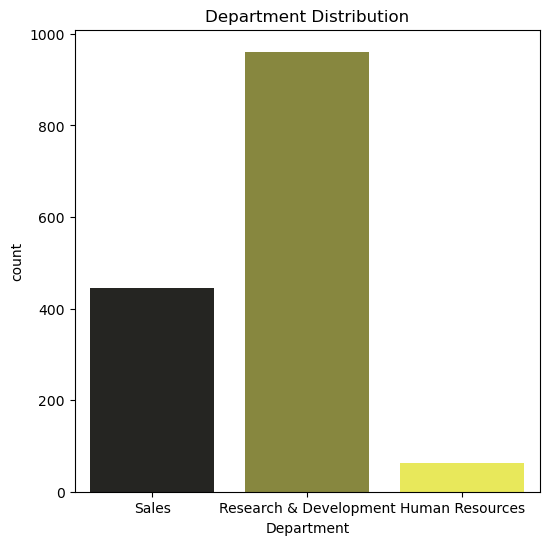

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Department', palette='dark:#FF4')
plt.title("Department Distribution")
plt.show()

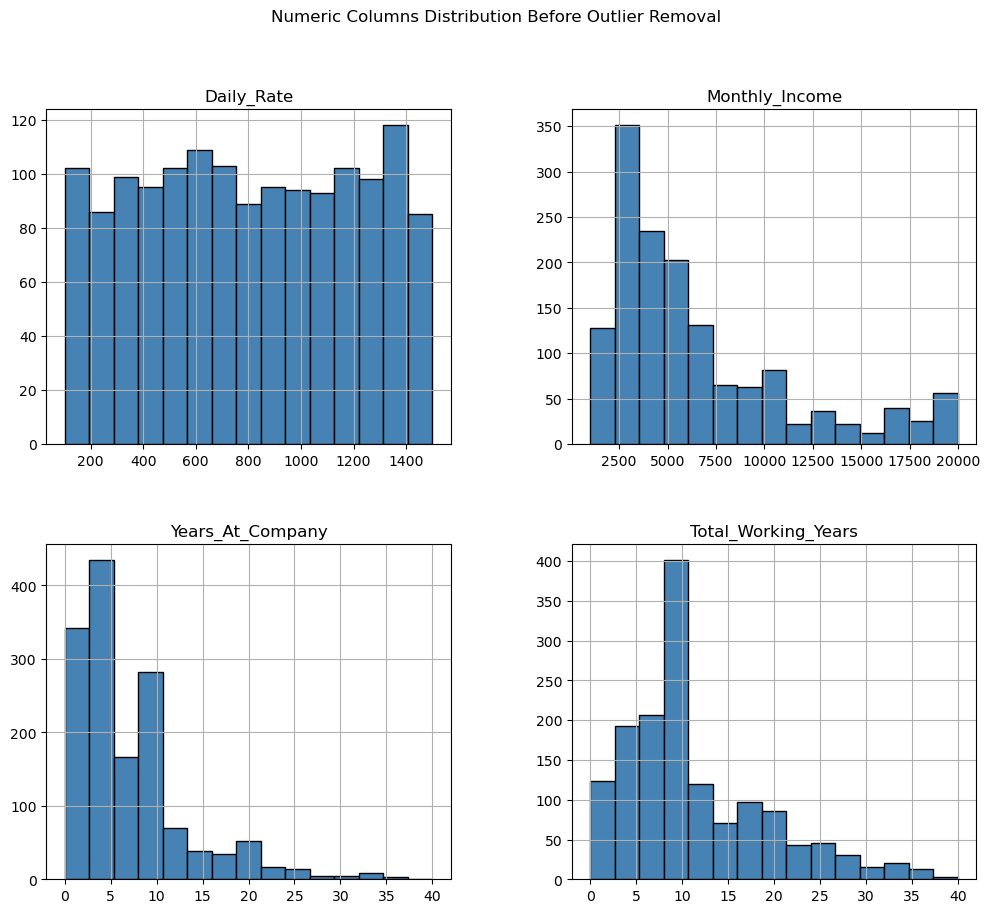

In [17]:
# Visualize Numeric Distributions Before Outlier Removal
numeric_columns = ['Daily_Rate', 'Monthly_Income', 'Years_At_Company', 'Total_Working_Years']
data[numeric_columns].hist(bins=15, figsize=(12, 10), layout=(2, 2), color='steelblue', edgecolor='black')
plt.suptitle("Numeric Columns Distribution Before Outlier Removal")
plt.show()

In [18]:
# 6.Additional Transformations
# Outlier Detection (Example using Z-score for numeric columns)

z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]  # Retain rows with Z-score < 3



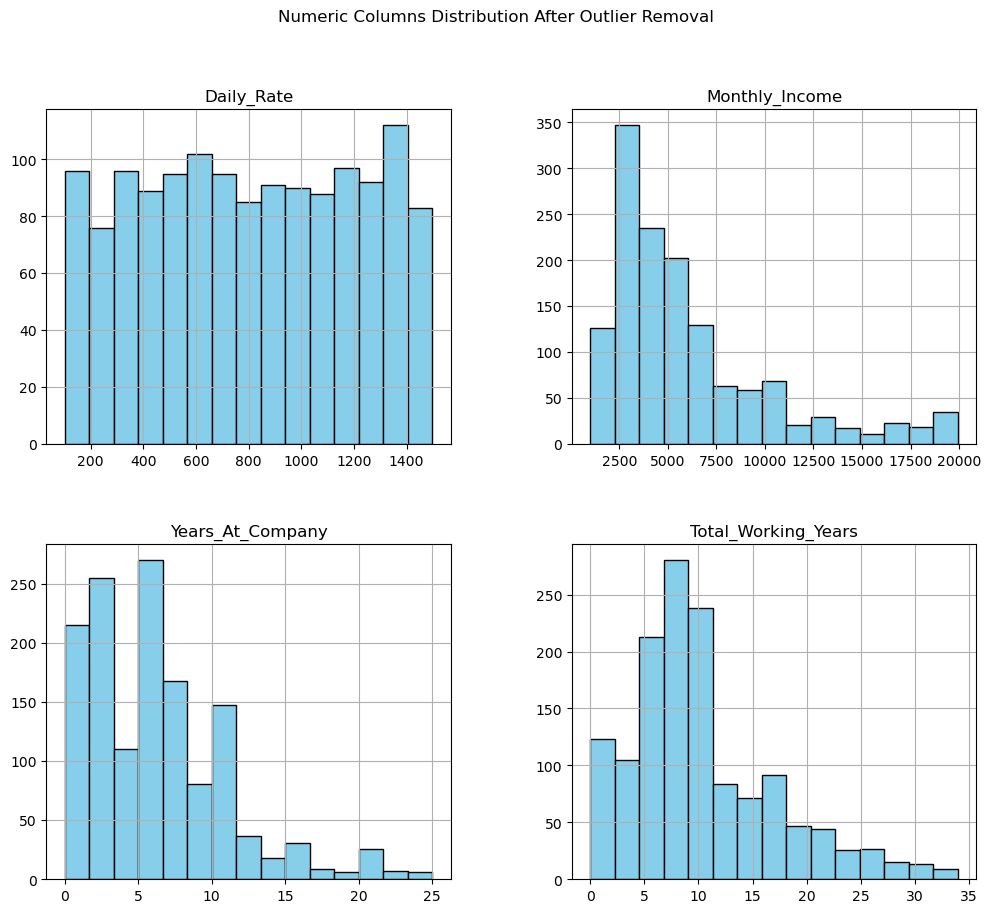

In [19]:
# Visualize Numeric Distributions After Outlier Removal
data[numeric_columns].hist(bins=15, figsize=(12, 10), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle("Numeric Columns Distribution After Outlier Removal")
plt.show()


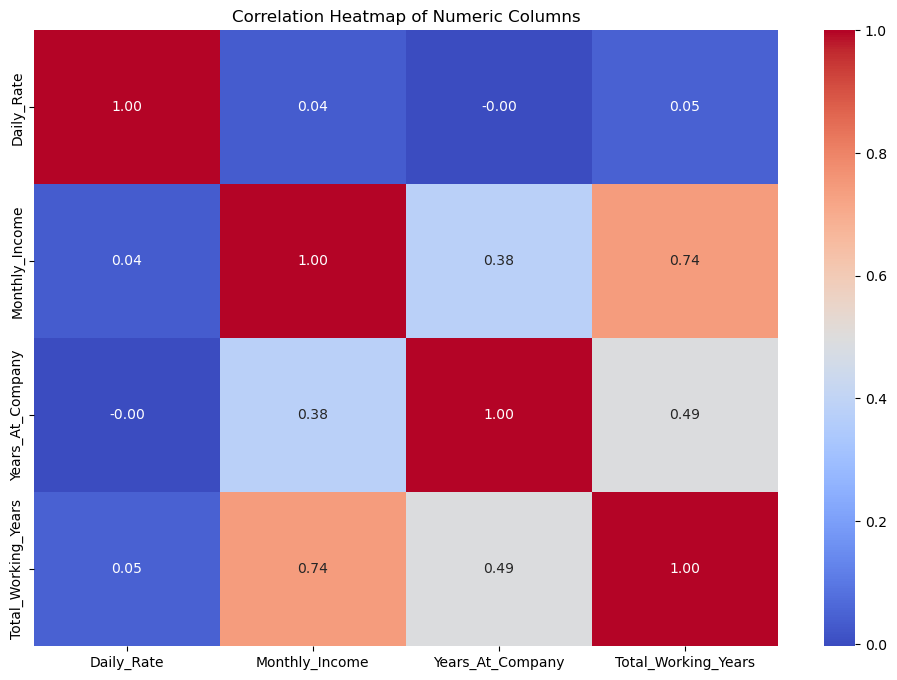

In [20]:
# Correlation Heatmap for Numeric Columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [21]:
# Normalize or Scale Numeric Columns
scaler = MinMaxScaler()
numeric_columns = ['Daily_Rate', 'Monthly_Income', 'Years_At_Company', 'Total_Working_Years']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])



##### Normalization bring value in between 0 and 1 which avoid giving importance to value with higher values

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1387 non-null   int64  
 1   Employee_Attrition          1387 non-null   object 
 2   Business_Travel_Frequency   1387 non-null   object 
 3   Daily_Rate                  1387 non-null   float64
 4   Department                  1387 non-null   object 
 5   Home_Distance               1387 non-null   int64  
 6   Education                   1387 non-null   int64  
 7   Field_of_Education          1387 non-null   object 
 8   Environment_Satisfaction    1387 non-null   int64  
 9   Gender                      1387 non-null   object 
 10  HourlyRate                  1387 non-null   int64  
 11  Job_Involvement             1387 non-null   int64  
 12  Job_Level                   1387 non-null   int64  
 13  JobRole                     1387 non-n

In [23]:
data.head()

,Age,Employee_Attrition,Business_Travel_Frequency,Daily_Rate,Department,Home_Distance,Education,Field_of_Education,Environment_Satisfaction,Gender,...,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,Yes,Travel Rarely,0.716332,Sales,1,2,Life Sciences,2,Female,...,3,1,0,0.235294,0,1,0.24,4,0,5
1,49,No,Travel Frequently,0.126791,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,0.294118,3,3,0.40,7,1,7
2,37,Yes,Travel Rarely,0.910458,Research & Development,2,2,Other,4,Male,...,3,2,0,0.205882,3,3,0.00,0,0,0
3,33,No,Travel Frequently,0.924069,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,0.235294,3,3,0.32,7,3,0
4,27,No,Travel Rarely,0.350287,Research & Development,2,1,Medical,1,Male,...,3,4,1,0.176471,3,3,0.08,2,2,2
